# Assignment 4 - Clustering & Model Fitting

**Student Name- Ilamparithi venkatesan**

**This assignment is related to finding out the possible and best clusters from World Bank Data API which would help us to understand the health and economic infrastructure of a country. In this project we are going to fit the possible models and trying to find out the optimum parameter va;lues absed on that we are going to predict the post results. Clustering is to identify the meaningful groups among the data.**

In [2]:
import pandas as pd
import wbgapi as wb

In [3]:
#Country codes
contry_code = ["IND","BRA",'AFG','AUS','JPN','ESP','CHN','CHE','BGD','DNK']
#Country names 
contry_name={"IND":"India","BRA":"Brazil","AFG":"Afghanistan","AUS":"Australia","JPN":"Japan","ESP":"Spain","CHN":"China","CHE":"Switzerland","BGD":"Bangladesh","DNK":"Denmark"}
#Continents
contry_grps={"IND":"Asia","BRA":"South America","AFG":"Asia","AUS":"Australia","JPN":"Asia","ESP":"Europe","CHN":"Asia","CHE":"Europe","BGD":"Asia","DNK":"Europe"}

dfrm_ind= ["SL.TLF.CACT.NE.ZS","NE.DAB.TOTL.ZS","SL.UEM.1524.FE.ZS","NY.GDP.MKTP.PP.CD","SH.DYN.NMRT","SH.DYN.MORT.FE","SH.DYN.NCOM.MA.ZS","SH.ANM.CHLD.ZS"]

dfrm=wb.data.DataFrame(dfrm_ind, contry_code, mrv=10)

dfrm1=pd.DataFrame(contry_grps.items())
dfrm1.rename(columns={0:'Country_Code',1:'Continent'},inplace=True)

dfrm2=dfrm.reset_index()

dfrm3=pd.merge(dfrm2,dfrm1,left_on='economy',right_on='Country_Code')

dfrm3.head(9)

C:\Users\DELL\anaconda3\lib\site-packages\wbgapi\data.py:327: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy = pd.Series()    # empty series - never assigned actual values


,economy,series,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,Country_Code,Continent
0,AFG,NE.DAB.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,Asia
1,AFG,NY.GDP.MKTP.PP.CD,5.966700e+10,6.503984e+10,6.905834e+10,7.183170e+10,7.009796e+10,7.471192e+10,7.741557e+10,8.187980e+10,8.091834e+10,NaN,AFG,Asia
2,AFG,SH.ANM.CHLD.ZS,4.350000e+01,4.350000e+01,4.360000e+01,4.370000e+01,4.390000e+01,4.420000e+01,4.450000e+01,4.490000e+01,NaN,NaN,AFG,Asia
3,AFG,SH.DYN.MORT.FE,7.670000e+01,7.320000e+01,6.990000e+01,6.670000e+01,6.380000e+01,6.110000e+01,5.870000e+01,5.640000e+01,5.430000e+01,NaN,AFG,Asia
4,AFG,SH.DYN.NCOM.MA.ZS,3.680000e+01,3.620000e+01,3.570000e+01,3.540000e+01,3.510000e+01,3.500000e+01,3.470000e+01,3.440000e+01,NaN,NaN,AFG,Asia
5,AFG,SH.DYN.NMRT,4.460000e+01,4.320000e+01,4.190000e+01,4.050000e+01,3.930000e+01,3.820000e+01,3.720000e+01,3.610000e+01,3.520000e+01,NaN,AFG,Asia
6,AFG,SL.TLF.CACT.NE.ZS,4.696000e+01,NaN,5.173000e+01,NaN,NaN,4.731000e+01,NaN,NaN,4.158000e+01,NaN,AFG,Asia
7,AFG,SL.UEM.1524.FE.ZS,2.236600e+01,2.195100e+01,2.168100e+01,2.147900e+01,2.138600e+01,2.129200e+01,2.124400e+01,2.133700e+01,2.133300e+01,NaN,AFG,Asia
8,AUS,NE.DAB.TOTL.ZS,1.001680e+02,1.013035e+02,1.002790e+02,1.014871e+02,1.022780e+02,9.948901e+01,9.964269e+01,9.750553e+01,9.607182e+01,NaN,AUS,Australia


In [170]:
#Pivot Table function on dataframe
tbl_pvt=pd.pivot_table(dfrm,index=['series','YR2020']).reset_index()
tbl_pvt.head(9)

,series,YR2020,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2021
0,NE.DAB.TOTL.ZS,91.205362,89.257279,88.128558,88.671357,88.328715,88.380780,89.110471,87.665325,88.152128,NaN
1,NE.DAB.TOTL.ZS,93.549168,93.979978,93.392499,93.037635,93.211871,93.316863,92.824637,93.855390,92.608131,NaN
2,NE.DAB.TOTL.ZS,96.071819,100.168022,101.303456,100.279002,101.487056,102.277975,99.489005,99.642692,97.505534,NaN
3,NE.DAB.TOTL.ZS,98.366198,97.367879,98.116096,98.348896,97.225697,97.670114,97.880906,98.851163,99.269679,NaN
4,NE.DAB.TOTL.ZS,98.526848,97.934825,96.071144,96.900475,96.959604,96.012443,96.393649,97.282962,97.070015,NaN
5,NE.DAB.TOTL.ZS,98.612586,101.359195,102.301496,102.661520,101.153243,99.600324,99.281799,99.606204,100.245213,NaN
6,NE.DAB.TOTL.ZS,99.989464,101.641382,102.410455,102.594124,100.553889,99.194327,99.240335,99.980025,100.031126,NaN
7,NE.DAB.TOTL.ZS,100.359794,105.492226,101.964128,102.836380,101.552302,99.776521,100.474524,102.275541,102.375684,NaN
8,NE.DAB.TOTL.ZS,106.694314,107.038572,106.353526,106.487933,106.728219,104.674816,105.181203,108.400126,106.546869,NaN


In [178]:
#Pivot Table function on dataframe
tb=pd.pivot_table(dfrm3,index=['Country_Code']).reset_index()
tb.groupby('Country_Code').sum()

,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
Country_Code,,,,,,,,,,
AFG,8.523858e+09,1.083997e+10,9.865478e+09,1.197195e+10,1.168299e+10,1.067313e+10,1.290260e+10,1.364663e+10,1.618367e+10,0.000000
AUS,1.217282e+11,1.327163e+11,1.375701e+11,1.376821e+11,1.428936e+11,1.488368e+11,1.566701e+11,1.640796e+11,2.283142e+11,65.839996
BGD,6.337126e+10,6.002732e+10,7.434618e+10,7.936715e+10,7.600592e+10,8.305046e+10,1.048368e+11,1.154079e+11,1.692563e+11,0.000000
BRA,3.748168e+11,3.917367e+11,3.983944e+11,3.768444e+11,3.673868e+11,3.773382e+11,3.932901e+11,4.059599e+11,5.255678e+11,0.000000
CHE,5.991008e+10,6.292003e+10,6.561463e+10,6.835068e+10,7.128344e+10,7.300654e+10,7.626732e+10,7.721389e+10,1.032721e+11,0.000000
CHN,1.890567e+12,2.023133e+12,2.140160e+12,2.224593e+12,2.339012e+12,2.841005e+12,3.105582e+12,3.349093e+12,4.856635e+12,0.000000
DNK,3.131558e+10,3.279601e+10,3.379133e+10,3.484354e+10,3.721489e+10,3.989127e+10,4.162942e+10,4.266403e+10,5.853749e+10,0.000000
ESP,1.854559e+11,1.890093e+11,1.947882e+11,2.026337e+11,2.166518e+11,2.302226e+11,2.380624e+11,2.456617e+11,2.980450e+11,0.000000
IND,7.691444e+11,9.253597e+11,9.687174e+11,1.022828e+12,1.105000e+12,1.182419e+12,1.128672e+12,1.195251e+12,1.495913e+12,0.000000


In [176]:
tb.transpose()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
Country_Code,AFG,AFG,AFG,AFG,AFG,AUS,AUS,AUS,AUS,AUS,...,IND,IND,IND,IND,JPN,JPN,JPN,JPN,JPN,JPN
YR2020,21.333,35.2,41.580002,54.3,80918342084.786407,2.4,3.4,13.164,65.029999,96.071819,...,33.0,51.110001,100.359794,8975476834845.410156,0.8,2.4,4.227,62.0,99.989464,5334236727898.19043
YR2012,22.365999,44.6,46.959999,76.7,59667003515.196198,2.5,3.9,10.897,65.150002,100.168022,...,54.4,51.610001,105.492226,6153155415797.75,1.0,2.8,7.497,59.009998,101.641382,4799612889015.099609
YR2013,21.951,43.2,NaN,73.2,65039839448.556099,2.4,3.8,11.315,64.940002,101.303456,...,51.1,NaN,101.964128,6477517561942.860352,1.0,2.7,6.078,59.25,102.410455,5021591088716.879883
YR2014,21.681,41.9,51.73,69.9,69058343420.160202,2.4,3.6,12.426,64.699997,100.279002,...,48.0,NaN,102.83638,6781021982581.719727,0.9,2.7,5.526,59.439999,102.594124,5034454618847.269531
YR2015,21.479,40.5,NaN,66.7,71831696727.808594,2.3,3.5,11.888,65.0,101.487056,...,45.0,NaN,101.552302,7159798324012.179688,0.9,2.6,5.138,59.5,100.553889,5199915217476.25
YR2016,21.386,39.3,NaN,63.8,70097956089.287704,2.3,3.5,11.4,64.870003,102.277975,...,42.2,NaN,99.776521,7735001687457.929688,0.9,2.5,4.446,59.990002,99.194327,5158900389806.610352
YR2017,21.292,38.2,47.310001,61.1,74711922906.373795,2.3,3.4,11.508,65.169998,99.489005,...,39.5,NaN,100.474524,8276934253114.330078,0.9,2.5,4.468,60.439999,99.240335,5262254961496.860352
YR2018,21.243999,37.2,NaN,58.7,77415569869.816193,2.3,3.4,10.719,65.629997,99.642692,...,37.1,47.98,102.275541,9029375940711.859375,0.9,2.4,3.051,61.5,99.980025,5339831831131.110352
YR2019,21.337,36.1,NaN,56.4,81879802965.492996,2.4,3.4,10.63,65.949997,97.505534,...,34.9,48.139999,102.375684,9562005607605.220703,0.9,2.4,3.834,62.099998,100.031126,5380978414306.419922


In [180]:
print(tb.describe())
print(tb.corr())

             YR2012        YR2013        YR2014        YR2015        YR2016  \
count  1.000000e+01  1.000000e+01  1.000000e+01  1.000000e+01  1.000000e+01   
mean   4.104785e+11  4.456237e+11  4.652554e+11  4.809105e+11  5.011994e+11   
std    5.811102e+11  6.300890e+11  6.647268e+11  6.927472e+11  7.310990e+11   
min    8.523858e+09  1.083997e+10  9.865478e+09  1.197195e+10  1.168299e+10   
25%    6.077538e+10  6.075050e+10  6.779752e+10  7.110480e+10  7.246406e+10   
50%    1.535921e+11  1.608628e+11  1.661792e+11  1.701579e+11  1.797727e+11   
75%    5.436679e+11  5.687083e+11  5.715787e+11  5.817031e+11  5.754936e+11   
max    1.890567e+12  2.023133e+12  2.140160e+12  2.224593e+12  2.339012e+12   

             YR2017        YR2018        YR2019        YR2020     YR2021  
count  1.000000e+01  1.000000e+01  1.000000e+01  1.000000e+01   2.000000  
mean   5.644225e+11  5.925392e+11  6.281600e+11  8.640764e+11  63.969997  
std    8.786255e+11  9.491310e+11  1.023338e+12  1.476066e+12  

# Clustering

In [219]:
import pandas as pd
import numpy as np
import sklearn.cluster as cluster

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.gridspec import GridSpec

In [117]:
def get_norm(array):

    minimum, maximum = np.min(array) , np.max(array)    
    val = (array-minimum) / (maximum-minimum)
    
    return val

def get_norm_df(data):
    
    for col in data.select_dtypes(include='number'):     
        data[col] = get_norm(data[col])
        
    return data

In [181]:
df_norm = get_norm_df(tb)

In [182]:
print(df_norm.describe())
print(df_norm.corr())

          YR2012     YR2013     YR2014     YR2015     YR2016     YR2017  \
count  10.000000  10.000000  10.000000  10.000000  10.000000  10.000000   
mean    0.213574   0.216064   0.213769   0.211938   0.210334   0.195648   
std     0.308766   0.313120   0.312035   0.313089   0.314136   0.310432   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.027763   0.024803   0.027194   0.026725   0.026116   0.022911   
50%     0.077080   0.074553   0.073377   0.071493   0.072224   0.063193   
75%     0.284342   0.277230   0.263679   0.257491   0.242257   0.203862   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

          YR2018     YR2019     YR2020    YR2021  
count  10.000000  10.000000  10.000000  2.000000  
mean    0.187422   0.184237   0.175168  0.500000  
std     0.306896   0.306807   0.304944  0.707107  
min     0.000000   0.000000   0.000000  0.000000  
25%     0.022798   0.021921   0.021400  0.250000  
50%     0.059645  

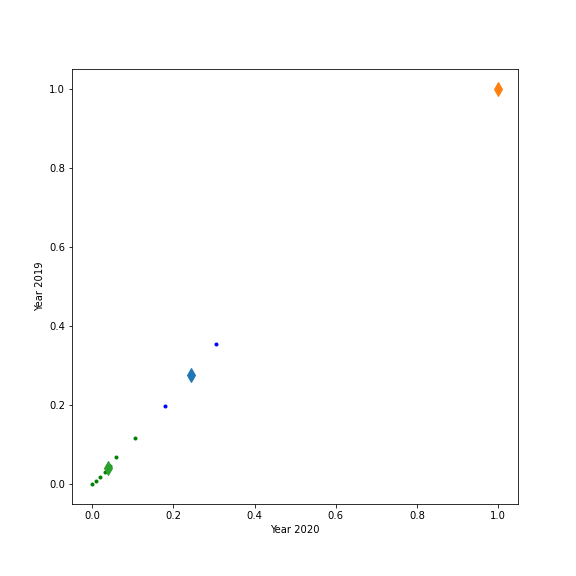

In [203]:
kmeans = cluster.KMeans(n_clusters=3)

# extract columns for fitting
df_fit = df_norm[["YR2020", "YR2019"]].dropna(how='any')
kmeans.fit(df_fit)     
#df_fit['Cluster'] = kmeans.fit_predict(df_fit)

df_fit['cluster'] = kmeans.fit_predict(df_fit)
df_fit['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})


# extract labels and cluster centres
labels = kmeans.labels_
center = kmeans.cluster_centers_

cen_x = [i[0] for i in center] 
cen_y = [i[1] for i in center]

## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})


# plot using the labels to select colour
plt.figure(figsize=(8.0,8.0))

color = ["blue", "red", "green"]
for l in range(len(color)):
    plt.plot(df_fit["YR2020"][labels==l], df_fit["YR2019"][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
for i in range(3):
    x, y = center[i,:]
    plt.plot(x, y, "d", markersize=10)
    
plt.xlabel("Year 2020")
plt.ylabel("Year 2019")
plt.show()

In [162]:
#df_fit

In [198]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget


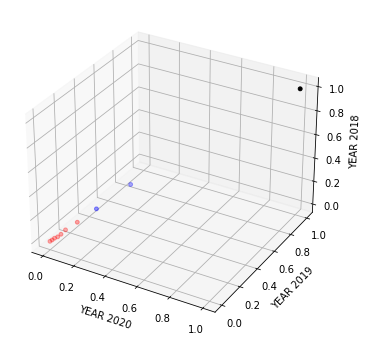

In [235]:
df = df_norm[["YR2020", "YR2019","YR2018"]].dropna(how='any')
colors = ['blue', 'red', 'black']
kmeans = cluster.KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[["YR2020", "YR2019","YR2018"]])
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df.YR2020, df.YR2019, df.YR2018, c=df.c, s=15)
ax.set_xlabel('YEAR 2020')
ax.set_ylabel('YEAR 2019')
ax.set_zlabel('YEAR 2018')
plt.show()

In [ ]:
def err_ranges(x, func, param, sigma):
    """
    Calculates the upper and lower limits for the function, parameters and
    sigmas for single value or array x. Functions values are calculated for 
    all combinations of +/- sigma and the minimum and maximum is determined.
    Can be used for all number of parameters and sigmas >=1.
    
    This routine can be used in assignment programs.
    """

    import itertools as iter
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper   



# Model Fitting using curve_fit

In [184]:
tbl_pvt.head()

,series,YR2020,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2021
0,NE.DAB.TOTL.ZS,91.205362,89.257279,88.128558,88.671357,88.328715,88.380780,89.110471,87.665325,88.152128,NaN
1,NE.DAB.TOTL.ZS,93.549168,93.979978,93.392499,93.037635,93.211871,93.316863,92.824637,93.855390,92.608131,NaN
2,NE.DAB.TOTL.ZS,96.071819,100.168022,101.303456,100.279002,101.487056,102.277975,99.489005,99.642692,97.505534,NaN
3,NE.DAB.TOTL.ZS,98.366198,97.367879,98.116096,98.348896,97.225697,97.670114,97.880906,98.851163,99.269679,NaN
4,NE.DAB.TOTL.ZS,98.526848,97.934825,96.071144,96.900475,96.959604,96.012443,96.393649,97.282962,97.070015,NaN


In [185]:
from scipy.optimize import curve_fit

In [231]:
df = tbl_pvt.loc[:,['YR2020','YR2019']].dropna(how='any')

x_model1 = list(np.array(df['YR2019']))
y_model1 = np.array(df['YR2020'])

def lin_model(x,a,b):
    y = b+(x*a)
    return y

opt_parm ,cov_mat = curve_fit(lin_model,x_model1,y_model1)

print('Optimum Parameters\n',opt_parm)
print()
print('Covariance Matrix\n',cov_mat)

Optimum Parameters
 [ 1.01931972 -0.69855437]

Covariance Matrix
 [[ 2.26211950e-05 -8.54591553e-04]
 [-8.54591553e-04  3.37981390e+20]]


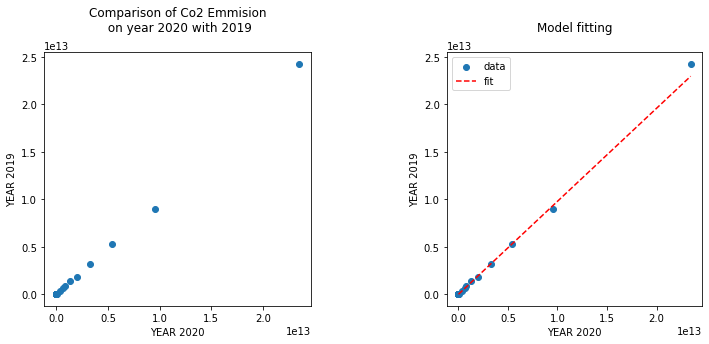

In [230]:
fig = plt.figure(figsize=(15,5))
gs = GridSpec(15, 75)

#Horizontal Bar Chart
ax1 = plt.subplot(gs[:14,:24])
plt.scatter(tbl_pvt['YR2019'],tbl_pvt['YR2020'])
plt.title('Comparison of Co2 Emmision\n on year 2020 with 2019\n ')
plt.xlabel("YEAR 2020")
plt.ylabel("YEAR 2019")

#Scatter plot (Correlation Plot)
ax2 = plt.subplot(gs[:14, 36:59])
plt.scatter(x_model1, y_model1)

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.linspace(min(x_model1), max(x_model1), 100)

# calculate the output for the range
y_line = lin_model(x_line, a, b)

# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
#plt.errorbar(x_line, y_line, yerr=1.6, xerr=2.7, fmt="none")

plt.title('Model fitting\n')
plt.xlabel("YEAR 2020")
plt.ylabel("YEAR 2019")
plt.legend(['data','fit'],loc='best')
plt.show()


# Prediction

Based on the data points, It is obvious that the data follows linearity and our optimum parameter values are 


a = 1.01931972                                                                                                                   
b=-0.69855437

Y = (a*x) + b   ===>  Y = (1.01931972  * x) - 0.69855437

Aggregated GDP of 2020 is 91.205362 in Afganistan, the prediction value of 2021 is, (based on the optimum parameters) 	 

In [237]:
Y = (1.01931972 * 91.205362) - 0.69855437
print(f'Prediction of GDP in Afganistan in the year of 2021 is {Y}')

Prediction of GDP in Afganistan in the year of 2021 is 92.26886968633863
